# Polynomial Regression on Boston Housing dataset

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [207]:
# Load dataset
df = pd.read_csv("HousingData.csv") 
# Data contains null spaces
df = df.dropna()

# Choosing a single feature for visualization
feature_col = "LSTAT"  
X = df[["LSTAT"]]
y = df["MEDV"]

# Splitting into train & test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [208]:
# Standardizing the data

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)  


In [209]:
degree = 8  
poly = PolynomialFeatures(degree=degree)
x_poly_train = poly.fit_transform(x_train_scaler)
x_test_poly = poly.transform(x_test_scaler)


In [210]:
lr = LinearRegression()
lr.fit(x_poly_train, y_train)


LinearRegression()

In [211]:
y_pred2 = lr.predict(x_test_poly)


### Plotting 

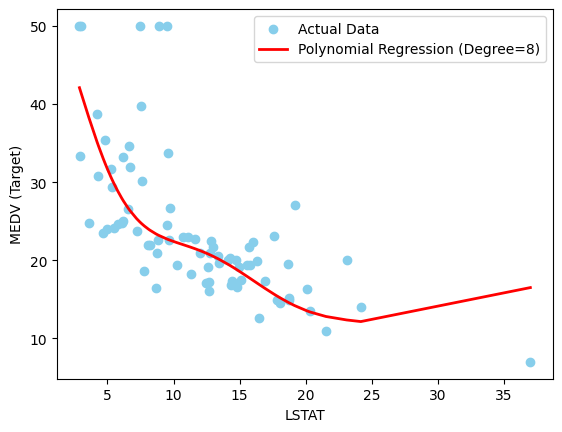

In [212]:

# Sorting
sorted_indices = np.argsort(x_test[feature_col].values.flatten())
x_test_sorted = x_test.iloc[sorted_indices]
y_pred_sorted = y_pred2[sorted_indices]


# Plot
plt.scatter(x_test, y_test, color="skyblue", label="Actual Data")
plt.plot(x_test_sorted, y_pred_sorted, color="red", linewidth=2, label=f"Polynomial Regression (Degree={degree})")

plt.xlabel(feature_col)
plt.ylabel("MEDV (Target)")
plt.legend()
plt.show()


### Regression Evaluation

In [213]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

#Printing values
print ("R2 Score: ", r2)   # variance
print("MSE: ", mse)
print("Mae: ", mae)
print("Intercept: " , intercept)

R2 Score:  0.627084994167318
MSE:  31.454047664950963
Mae:  3.367983225154248
Intercept:  20.503090847331983
